<a href="https://colab.research.google.com/github/adrianasamaniego/adrianasamaniego/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np

# Define data
num_students = 100
names = [f"Nombre {i}" for i in range(num_students)]
last_names = [f"Apellido {i}" for i in range(num_students)]
dni_numbers = np.random.randint(30000000, 55000000, size=num_students)
subjects = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Biología", "Física", "Química", "Inglés"]
grades_1st_trimester = np.random.randint(1, 11, size=(num_students, len(subjects)))
grades_2nd_trimester = np.random.randint(1, 11, size=(num_students, len(subjects)))
grades_3rd_trimester = np.random.randint(1, 11, size=(num_students, len(subjects)))
absences = np.random.randint(0, 30, size=(num_students, len(subjects)))

# Create DataFrame
df = pd.DataFrame()
df['Nombre'] = names
df['Apellido'] = last_names
df['DNI'] = dni_numbers

# Add subject data
for i, subject in enumerate(subjects):
    df[subject + ' - 1er Trimestre'] = grades_1st_trimester[:, i]
    df[subject + ' - 2do Trimestre'] = grades_2nd_trimester[:, i]
    df[subject + ' - 3er Trimestre'] = grades_3rd_trimester[:, i]
    df[subject + ' - Faltas'] = absences[:, i]

# Display the DataFrame
display(df)

,Nombre,Apellido,DNI,Matemática - 1er Trimestre,Matemática - 2do Trimestre,Matemática - 3er Trimestre,Matemática - Faltas,Lengua y Literatura - 1er Trimestre,Lengua y Literatura - 2do Trimestre,Lengua y Literatura - 3er Trimestre,...,Física - 3er Trimestre,Física - Faltas,Química - 1er Trimestre,Química - 2do Trimestre,Química - 3er Trimestre,Química - Faltas,Inglés - 1er Trimestre,Inglés - 2do Trimestre,Inglés - 3er Trimestre,Inglés - Faltas
0,Nombre 0,Apellido 0,40071193,4,8,9,28,8,1,7,...,2,25,9,1,10,23,10,8,8,17
1,Nombre 1,Apellido 1,45958954,8,8,6,25,7,10,9,...,1,14,3,2,4,18,4,4,2,20
2,Nombre 2,Apellido 2,49091553,9,2,7,7,7,2,2,...,3,28,8,5,7,28,7,3,8,4
3,Nombre 3,Apellido 3,51361369,2,2,6,0,1,5,10,...,4,16,2,10,8,6,7,6,2,22
4,Nombre 4,Apellido 4,33251394,1,1,9,6,6,8,6,...,3,17,6,6,8,28,5,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Nombre 95,Apellido 95,35481745,5,5,8,28,8,4,4,...,3,21,3,5,7,2,4,8,2,4
96,Nombre 96,Apellido 96,36394585,5,3,10,9,4,5,5,...,10,24,10,9,5,5,2,5,8,25
97,Nombre 97,Apellido 97,48449513,6,9,1,17,10,7,3,...,3,25,9,5,2,10,10,2,4,17
98,Nombre 98,Apellido 98,44769865,8,1,2,4,10,6,4,...,6,13,6,4,8,12,4,2,1,20


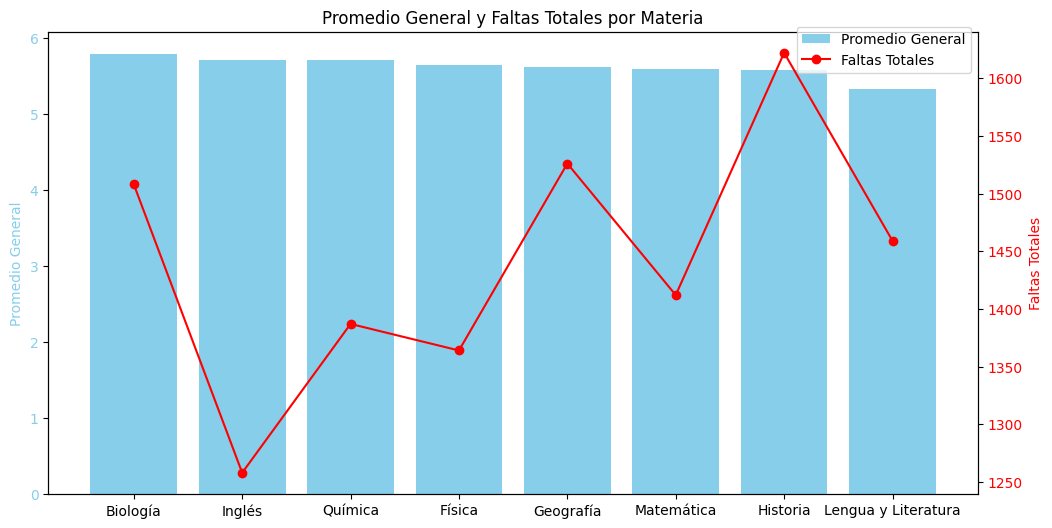

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average grades for each subject
subject_names = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Biología", "Física", "Química", "Inglés"]
avg_grades = []

for subject in subject_names:
    avg_grade = df[[subject + ' - 1er Trimestre', subject + ' - 2do Trimestre', subject + ' - 3er Trimestre']].mean(axis=1).mean()
    avg_grades.append(avg_grade)

# Calculate total absences for each subject
total_absences = []
for subject in subject_names:
    total_absence = df[subject + ' - Faltas'].sum()
    total_absences.append(total_absence)

# Sort subjects by average grade (descending)
sorted_indices = np.argsort(avg_grades)[::-1]  # Get indices that would sort the array
sorted_subjects = [subject_names[i] for i in sorted_indices]
sorted_avg_grades = [avg_grades[i] for i in sorted_indices]
sorted_total_absences = [total_absences[i] for i in sorted_indices]

# Create bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

# Primary axis: Average Grades
ax1.bar(sorted_subjects, sorted_avg_grades, color='skyblue', label='Promedio General')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Secondary axis: Absences
ax2 = ax1.twinx()  # Create a twin Axes sharing the xaxis
ax2.plot(sorted_subjects, sorted_total_absences, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
plt.title('Promedio General y Faltas Totales por Materia')
fig.legend(loc="upper right", bbox_to_anchor=(0.9,0.9))  # Adjust legend position

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()